Import libraries and load dataframe. 

In [3]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import requests
import json
from bs4 import BeautifulSoup as bs
import re
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [149]:
df = pd.read_csv('cleandatawithnewfeatures.csv')
pd.set_option('display.max_columns', None)
df = df.drop('Unnamed: 0', axis=1)

In [150]:
df.head(100)

,Property Id,Property Name,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,Metered Areas (Energy),ENERGY STAR Score,Median Income for Zip,building_type,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,ENERGY STAR binned,binned source EUI
0,"13,286",201/205,10017,619.4,2,Manhattan,Office,293447.0,1963,Whole Building,NaN,69273.0,large office,0.971583,0.028417,0.000000,0.000000,0.307671,0.399872,0.026777,0.000000,0.265680,0.797097,Not Available,Extremely High
1,"28,400",NYP Columbia (West Campus),10032,404.3,12,Manhattan,Hospital (General Medical & Surgical),3889181.0,1969,Whole Building,55.0,26237.0,hospital / medical,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate,Extremely High
2,"28,402",NYP Cornell (East Campus),10021,414.2,12,Manhattan,Hospital (General Medical & Surgical),2971874.0,1932,Whole Building,55.0,75472.0,hospital / medical,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate,Extremely High
3,"5,871,253",Cadman - 10 Clinton St,11201,352.2,1,Brooklyn,Multifamily Housing,162656.0,1903,Whole Building,1.0,56293.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Low,Extremely High
4,"4,988,574",- 720 Ft. Washington Ave. bldg,10040,106.6,1,Manhattan,Multifamily Housing,204720.0,1939,Whole Building,67.0,27905.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Moderate
5,"4,988,569",- 730 Ft. Washington Ave bldg,10040,97.7,1,Manhattan,Multifamily Housing,116744.0,1939,Whole Building,80.0,27905.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Low
6,"4,988,686",- 830 Park Avenue bldg,10021,74.3,1,Manhattan,Multifamily Housing,130629.0,1911,Another configuration,100.0,75472.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Low
7,"4,988,688",- 840 Park Avenue bldg,10021,53.9,1,Manhattan,Multifamily Housing,54913.0,1911,Another configuration,100.0,75472.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Low
8,"4,954,491",558 RIVERSIDE DRIVE,10027,0.0,1,Manhattan,College/University,256528.0,1964,Whole Building,NaN,23150.0,secondary education,0.911872,0.048160,0.039968,0.000000,0.428321,0.220910,0.179954,0.013436,0.157379,0.539677,Not Available,Low
9,"4,954,504",564 RIVERSIDE DRIVE,10027,0.0,1,Manhattan,College/University,339104.0,1964,Whole Building,NaN,23150.0,secondary education,0.911872,0.048160,0.039968,0.000000,0.428321,0.220910,0.179954,0.013436,0.157379,0.539677,Not Available,Low


Select dataframe including buildings with the highest EUI rating according to the binning work done in previous exercise.

In [151]:
df_bad_bois = df[df['binned source EUI'] == 'Extremely High']

In [152]:
df.describe()

,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,ENERGY STAR Score,Median Income for Zip,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total
count,10578.000000,10578.000000,10578.000000,1.057800e+04,10578.000000,9198.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,10555.355266,368.392380,1.267442,1.513009e+05,1948.002931,60.032616,48339.201172,0.834651,0.159044,0.003986,0.003631,0.358639,0.412787,0.082690,0.001503,0.170920,0.240867
std,566.458104,9582.008257,4.050107,2.647726e+05,30.152637,29.804784,22175.428359,0.109601,0.093633,0.020992,0.006571,0.096508,0.073012,0.038295,0.022462,0.072869,0.256739
min,10001.000000,0.000000,0.000000,5.400000e+01,1600.000000,1.000000,14271.000000,0.000000,0.000000,0.000000,0.000000,0.153924,0.077675,0.022014,0.000000,0.024620,0.081088
25%,10023.000000,100.400000,1.000000,6.529700e+04,1927.000000,37.000000,29498.000000,0.831703,0.168291,0.000000,0.002455,0.320048,0.434433,0.070451,0.000000,0.158071,0.081088
50%,10453.000000,124.500000,1.000000,9.038200e+04,1940.000000,65.000000,44518.000000,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088
75%,11218.000000,159.400000,1.000000,1.501948e+05,1965.000000,85.000000,64481.000000,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.401527
max,11691.000000,912801.100000,161.000000,1.421712e+07,2019.000000,100.000000,112947.000000,1.000000,0.753075,0.331195,0.165802,0.695297,0.454661,0.264074,0.478504,0.608086,0.956016


In [153]:
df_bad_bois.describe()

,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,ENERGY STAR Score,Median Income for Zip,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total
count,529.000000,529.000000,529.000000,5.290000e+02,529.000000,423.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,10385.737240,4952.360302,1.170132,2.032288e+05,1950.718336,21.992908,54902.030246,0.804419,0.164931,0.026091,0.003308,0.335432,0.336943,0.083957,0.017777,0.240519,0.520804
std,526.566829,42626.893063,1.057699,3.418383e+05,35.577301,25.880466,21753.865093,0.248706,0.210687,0.049109,0.016271,0.122595,0.119722,0.056159,0.081899,0.154538,0.299213
min,10001.000000,261.100000,0.000000,5.400000e+01,1836.000000,1.000000,14271.000000,0.000000,0.000000,0.000000,0.000000,0.153924,0.077675,0.022014,0.000000,0.024620,0.081088
25%,10017.000000,286.500000,1.000000,6.250000e+04,1924.000000,1.000000,40024.000000,0.831703,0.028417,0.000000,0.000000,0.307671,0.220910,0.026777,0.000000,0.157379,0.081088
50%,10036.000000,334.500000,1.000000,9.605200e+04,1950.000000,11.000000,55869.000000,0.857298,0.057951,0.000000,0.000012,0.320048,0.399872,0.083000,0.000000,0.158071,0.623576
75%,10474.000000,448.800000,1.000000,1.872740e+05,1976.000000,35.000000,69273.000000,0.957772,0.168291,0.039968,0.004439,0.355601,0.434433,0.083000,0.004100,0.265680,0.797097
max,11691.000000,912801.100000,12.000000,3.889181e+06,2014.000000,100.000000,112947.000000,1.000000,0.753075,0.331195,0.165802,0.695297,0.454661,0.264074,0.478504,0.608086,0.956016


In [154]:
main = df['Primary Property Type - Self Selected'].value_counts()

In [155]:
yikes = df_bad_bois['Primary Property Type - Self Selected'].value_counts()

In [156]:
df_main = pd.DataFrame(main)
df_yikes = pd.DataFrame(yikes)

df_yikes = df_yikes.reset_index()

In [157]:
df_main = df_main.reset_index()

Plot bar graph and show dataframe to view total sample distribution by building type.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

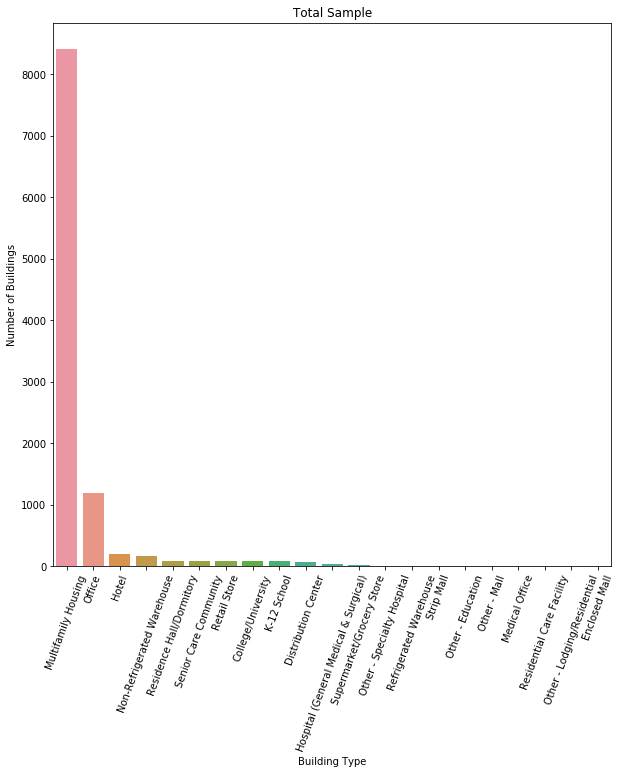

In [158]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_main['index'], y=df_main['Primary Property Type - Self Selected'])
plt.xlabel('Building Type')
plt.ylabel('Number of Buildings')
plt.title('Total Sample')
plt.xticks(rotation=70)

In [159]:
df_main

,index,Primary Property Type - Self Selected
0,Multifamily Housing,8413
1,Office,1192
2,Hotel,207
3,Non-Refrigerated Warehouse,161
4,Residence Hall/Dormitory,93
5,Senior Care Community,90
6,Retail Store,85
7,College/University,85
8,K-12 School,79
9,Distribution Center,65


View dataframe of highest EUI bin sorted by building type. Distribution has changed - prportion of multifamily housing decreased significantly. 

In [196]:
df_yikes

,index,Primary Property Type - Self Selected
0,Office,163
1,Multifamily Housing,146
2,Hotel,65
3,Senior Care Community,38
4,Hospital (General Medical & Surgical),26
5,College/University,21
6,Retail Store,20
7,Supermarket/Grocery Store,14
8,K-12 School,6
9,Other - Specialty Hospital,5


In [198]:
df_main.rename(columns={'index':'EUI Rating'}, 
                 inplace=True)

In [204]:
sizes = df_main['Primary Property Type - Self Selected']

Use pie chart to view distributions of total sample and highest EUI bin broken down by building type. 

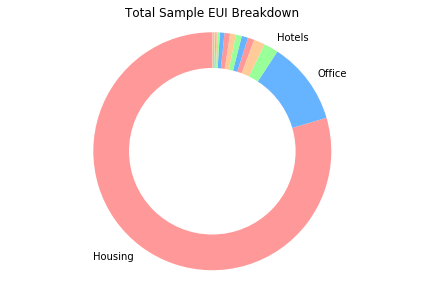

In [212]:
labels = ['Housing', 'Office', 'Hotels', '', '', '', '', '', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '', '']
sizes = df_main['Primary Property Type - Self Selected']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()

plt.pie(sizes, colors = colors, labels=labels, startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.title('Total Sample EUI Breakdown')
plt.show()

In [199]:
df_yikes.rename(columns={'index':'EUI Rating'}, 
                 inplace=True)

In [190]:
sizes = df_yikes['Primary Property Type - Self Selected']

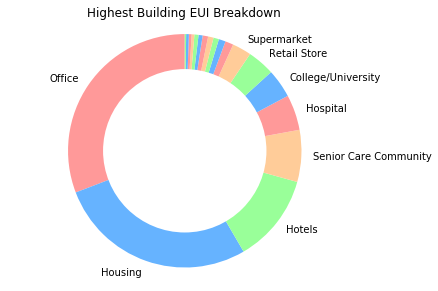

In [201]:
labels = ['Office', 'Housing', 'Hotels', 'Senior Care Community', 'Hospital', 'College/University', 'Retail Store', 'Supermarket', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
sizes = df_yikes['Primary Property Type - Self Selected']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()

plt.pie(sizes, colors = colors, labels=labels, startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.title('Highest Building EUI Breakdown')
plt.show()


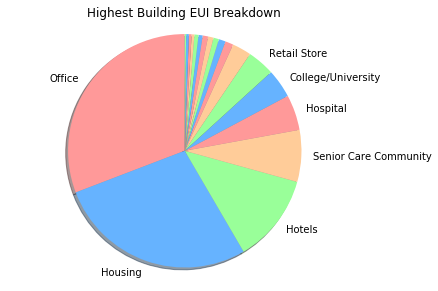

In [194]:

sizes = df_yikes['Primary Property Type - Self Selected']
# only "explode" the 2nd slice (i.e. 'Hogs')
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Highest Building EUI Breakdown')
plt.show()

In [38]:
df_yikes

,index,Primary Property Type - Self Selected
0,Office,163
1,Multifamily Housing,146
2,Hotel,65
3,Senior Care Community,38
4,Hospital (General Medical & Surgical),26
5,College/University,21
6,Retail Store,20
7,Supermarket/Grocery Store,14
8,K-12 School,6
9,Other - Specialty Hospital,5


In [39]:
df.sort_values('Source EUI (kBtu/ftå_)', ascending=False)

,Property Id,Property Name,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,Metered Areas (Energy),ENERGY STAR Score,Median Income for Zip,building_type,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,ENERGY STAR binned,binned source EUI
7363,"4,414,323",234 Skillman,11211,912801.1,1,Brooklyn,Multifamily Housing,56900.0,2004,Whole Building,1.0,23567.0,residential,0.806263,0.193737,0.000000,0.002455,0.557208,0.454661,0.070451,0.000000,0.137484,0.401527,Low,Extremely High
7453,"4,022,803",7-29 HEGEMAN LLC,11212,162951.8,1,Brooklyn,Multifamily Housing,158.0,1948,Whole Building,NaN,20839.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Not Available,Extremely High
3450,"2,946,993",St. Mary's Home for Working Girls,10021,152001.3,1,Manhattan,Residence Hall/Dormitory,67655.0,1960,Whole Building,1.0,75472.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Low,Extremely High
7527,"4,022,808",C GROSS,11212,134652.4,1,Brooklyn,Multifamily Housing,54.0,1931,Whole Building,NaN,20839.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Not Available,Extremely High
7528,"4,022,813",GROSS C,11236,133927.1,1,Brooklyn,Multifamily Housing,121.0,1966,Whole Building,NaN,42370.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Not Available,Extremely High
2844,"4,043,349",Rolex Realty Company Inc,10022,115108.0,1,Manhattan,Office,109514.0,1973,Whole Building,NaN,80406.0,large office,0.971583,0.028417,0.000000,0.000000,0.307671,0.399872,0.026777,0.000000,0.265680,0.797097,Not Available,Extremely High
2945,"5,870,209",950 Third Avenue Company,10022,94363.9,1,Manhattan,Office,320588.0,1971,"Tenant Cooling, Common Area Hot Water, Common ...",NaN,80406.0,large office,0.971583,0.028417,0.000000,0.000000,0.307671,0.399872,0.026777,0.000000,0.265680,0.797097,Not Available,Extremely High
6280,"3,584,061",Parkchester South (3944),10462,63231.7,1,Bronx,Multifamily Housing,3312.0,1940,Whole Building,1.0,33735.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Low,Extremely High
2763,"4,390,422",9 W 57th Street,10019,62474.1,1,Manhattan,Office,1383760.0,1971,Whole Building,1.0,55869.0,large office,0.971583,0.028417,0.000000,0.000000,0.307671,0.399872,0.026777,0.000000,0.265680,0.797097,Low,Extremely High
2766,"4,390,425",4 W 58th Street,10019,61857.7,1,Manhattan,Office,61000.0,1948,Whole Building,1.0,55869.0,large office,0.971583,0.028417,0.000000,0.000000,0.307671,0.399872,0.026777,0.000000,0.265680,0.797097,Low,Extremely High


By the eye test, no significant change in distribution according to Borough. 

In [40]:
df['Borough'].value_counts()

Manhattan        4820
Brooklyn         2100
Bronx            1812
Queens           1708
Staten Island     138
Name: Borough, dtype: int64

In [41]:
df_bad_bois['Borough'].value_counts()

Manhattan        324
Brooklyn          68
Queens            60
Bronx             56
Staten Island     21
Name: Borough, dtype: int64

Most hospitals are in the extremely high EUI category, which makes sense given their high energy operational requirements.

In [60]:
hospitals = df[df['building_type'] == 'hospital / medical']

In [65]:
hospitals = hospitals['binned source EUI'].value_counts()

In [66]:
hospitals = pd.DataFrame(hospitals)
hospitals = hospitals.reset_index()


In [70]:
hospitals.rename(columns={'index':'EUI Rating'}, 
                 inplace=True)

In [71]:
hospitals

,EUI Rating,binned source EUI
0,Extremely High,31
1,High,6
2,Low,3
3,Moderate,2


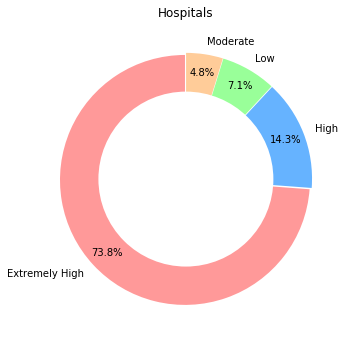

In [127]:
labels = hospitals['EUI Rating']
sizes = hospitals['binned source EUI']
# only "explode" the 2nd slice (i.e. 'Hogs')

#explsion
explode = (0.01,0.01,0.01,0.01)
plt.figure(figsize=(5,5))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Hospitals')
ax1.axis('equal')  
plt.tight_layout()
plt.show()



Distribution of office buildings in NYC is interesting - they have significantly higher EUI. 

In [88]:
offices = df[df['building_type'] == 'large office']

In [89]:
offices = offices['binned source EUI'].value_counts()
offices = pd.DataFrame(offices)
offices = offices.reset_index()
offices.rename(columns={'index':'EUI Rating'}, 
                 inplace=True)


In [90]:
offices

,EUI Rating,binned source EUI
0,High,526
1,Moderate,266
2,Extremely High,137
3,Low,106


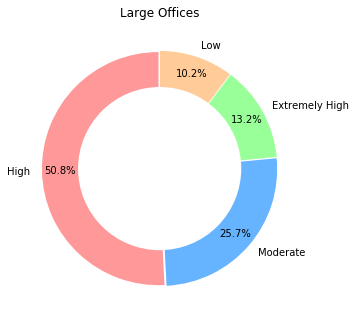

In [128]:
labels = offices['EUI Rating']
sizes = offices['binned source EUI']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.01,0.01,0.01,0.01)
plt.figure(figsize=(5,5))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#add colors


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Large Offices')
plt.show()

Multifamily buildings have proportionally lower EUI than other building types. 

In [135]:
res = df[df['building_type'] == 'residential']

In [137]:
res = res['binned source EUI'].value_counts()
res = pd.DataFrame(res)
res = res.reset_index()
res.rename(columns={'index':'EUI Rating'}, 
                 inplace=True)

In [138]:
res

,EUI Rating,binned source EUI
0,Moderate,4834
1,Low,2277
2,High,1306
3,Extremely High,188


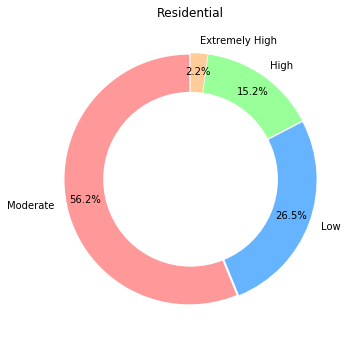

In [162]:
labels = res['EUI Rating']
sizes = res['binned source EUI']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.01,0.01,0.01,0.01)
plt.figure(figsize=(5,5))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#add colors


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Residential')
plt.show()

Hotel EUI breakdown is also notably high. 

In [164]:
hotel = df[df['building_type'] == 'large hotel']
hotel = hotel['binned source EUI'].value_counts()
hotel = pd.DataFrame(hotel)
hotel = hotel.reset_index()
hotel.rename(columns={'index':'EUI Rating'}, 
                 inplace=True)

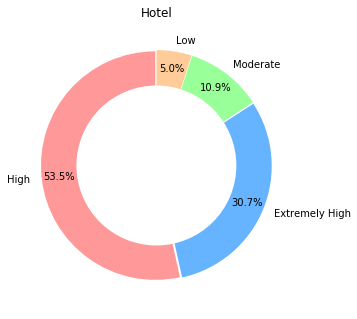

In [167]:
labels = hotel['EUI Rating']
sizes = hotel['binned source EUI']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.01,0.01,0.01,0.01)
plt.figure(figsize=(5,5))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#add colors


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Hotel')
plt.show()

When normalized under a logarithmic scale, building EUI looks remarkably normally distributed. 

In [169]:
df['Source EUI (kBtu/ftå_)'] = np.log(df['Source EUI (kBtu/ftå_)'] + 1)

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Ditribution of Energy Intensity for Buildings in New York City (Logarithmic Scale)')

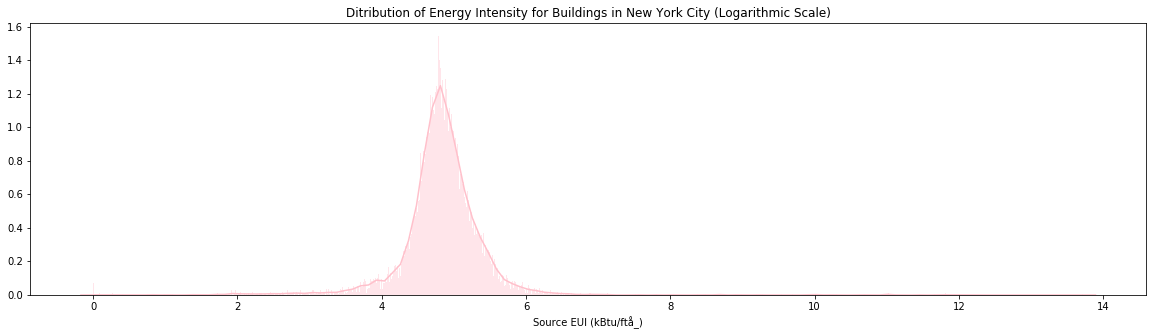

In [171]:
plt.figure(figsize=(20,5))
sns.distplot(df['Source EUI (kBtu/ftå_)'], bins=1000, color='pink')
plt.title('Ditribution of Energy Intensity for Buildings in New York City (Logarithmic Scale)')